# Notebook for plotting the location of the Sun and Cygnus on the sky over 1 year

* Choose Earth co-ords from one of the locations in LabFuncs.py
* labelling works for most locations but I make no promises 
* plot is generally a bit of a disaster but with tweaking it can look ok 

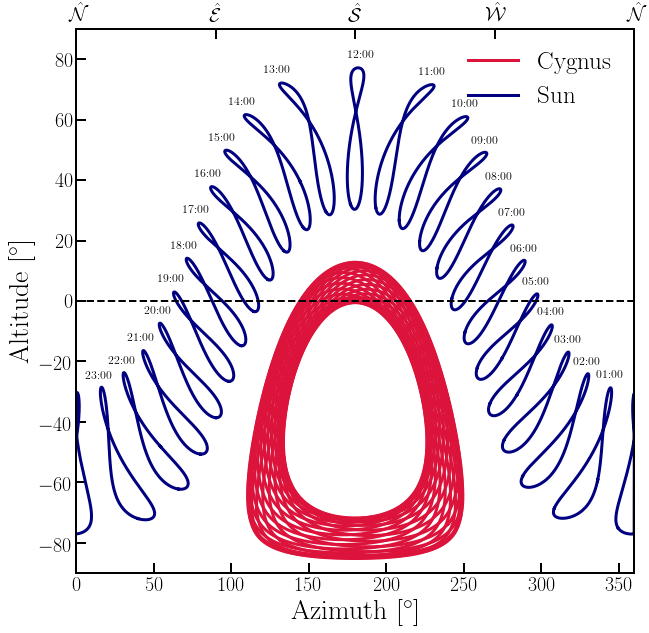

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from LabFuncs import *
from Params import *

# init plot
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Set location:
Loc = Kamioka
HaloModel = SHM
# setting longitude to 0 is basically the same as converting 
# universal time to local time
Loc.Longitude = 0.0 

# allocate arrays 
# not accounting for leap years cos why even
day_numbers = array([31,28,31,30,31,30,31,31,30,31,30,31])
days = zeros(shape=(365))
months = zeros(shape=(365))
ph_lab = zeros(shape=(365))
ph_sun = zeros(shape=(365))
th_lab = zeros(shape=(365))
th_sun = zeros(shape=(365))

# set day and month numbers to calculate Julian Day
ii = 0
for month in range(0,12):
    months[ii:(ii+day_numbers[month])] = month
    days[ii:(ii+day_numbers[month])] = range(0,day_numbers[month])
    ii = ii+day_numbers[month]
    
# hour labels
thr = ["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00","10:00","11:00",\
      "12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]

# loop over each hour THEN each day (this is how you define the analemma)
# i.e. each curve is the path traced out by observing sun/cygnus at the same time every day
for hour in range(0,24):
    for i in range(0,365):
        # calc Julian Day
        JD = JulianDay(months[i],days[i],2018,hour)

        # Lab velocity (CYGNUS co-ords are inverse of this)
        v_lab = -1.0*LabVelocity(JD,Loc,HaloModel)
        x_lab = v_lab/sqrt(sum(v_lab*v_lab))
        ph_lab[i] = arctan2(x_lab[1],x_lab[0])
        th_lab[i] = arcsin(x_lab[2])
    
        # Solar direction
        x_sun = SolarDirection(JD,Loc)
        ph_sun[i] = arctan2(x_sun[1],x_sun[0])
        th_sun[i] = arcsin(x_sun[2])
    
    # Plot lab velocity
    ph_lab[ph_lab<0] = ph_lab[ph_lab<0]+2*pi
    if (max(ph_lab)-min(ph_lab))>3*pi/2:
        i_s = argsort(ph_lab)
        th_lab = th_lab[i_s]
        ph_lab = ph_lab[i_s]
        ph_lab[0] = -1.0
        ph_lab[364] = 361.0
        
    plt.plot(ph_lab*180.0/pi,th_lab*180.0/pi,'-',linewidth=3,color='Crimson')
    
    
    
    # Plot solar direction (this is a bit mad but fixes problems with the plot)
    ph_sun[ph_sun<0] = ph_sun[ph_sun<0]+2*pi
    if (max(ph_sun)-min(ph_sun))>3*pi/2:
        ph_sun1 = ph_sun[ph_sun>pi]
        th_sun1 = th_sun[ph_sun>pi]
        plt.plot(ph_sun1*180.0/pi,th_sun1*180.0/pi,'-',linewidth=3,color='Navy')

        ph_sun2 = ph_sun[ph_sun<pi]
        th_sun2 = th_sun[ph_sun<pi]
        plt.plot(ph_sun2*180.0/pi,th_sun2*180.0/pi,'-',linewidth=3,color='Navy')
    else:
        plt.plot(ph_sun*180.0/pi,th_sun*180.0/pi,'-',linewidth=3,color='Navy')

    
    # Hour text labels
    if Loc.Latitude>0:
        ty = 180/pi*max(th_sun)+3.0
        nolab = 0
    else:
        ty = 180/pi*min(th_sun)-5.0
        nolab = 12
    if hour != nolab:
        if max(ph_sun)>pi: 
             plt.text(mod(180/pi*max(ph_sun)-10.0,360.0),ty,thr[hour],fontsize=12)
        else:
            plt.text(mod(180/pi*min(ph_sun)-10.0,360.0),ty,thr[hour],fontsize=12)

            

# Plot horizon line
plt.plot(array([0,360]),array([0,0]),'k--',linewidth=2)
#plt.text(310.687,6.769,"Horizon",fontsize=22)

# Plot fiddling
ax.set_xlim(left=0.0, right=360.0)
ax.set_ylim(bottom=-90.0, top=90.0)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r"Azimuth [$^{\circ}$]",fontsize=28);
plt.ylabel(r"Altitude [$^{\circ}$]",fontsize=28);

# Dummy lines for legend
plt.plot([-10,-20],[0,0],'-',color='Crimson',linewidth=3,label="Cygnus")
plt.plot([-10,-20],[0,0],'-',color='Navy',linewidth=3,label="Sun")
if Loc.Latitude>0:
    legloc = "upper right"
else:
    legloc = "lower right"
plt.legend(fontsize=25,frameon=False,loc=legloc)

# add top axis showing cardinal directions
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([0.,90.,180.,270.,360.])
ax2.set_xticklabels([r"$\hat{\mathcal{N}}$",r"$\hat{\mathcal{E}}$",\
                     r"$\hat{\mathcal{S}}$",r"$\hat{\mathcal{W}}$",r"$\hat{\mathcal{N}}$"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax2.tick_params(which='major',direction='in',width=2,length=10)
ax2.tick_params(which='minor',direction='in',width=1,length=7)


plt.show()
fig.savefig('../plots/SolarCygnus.pdf')


In [3]:
Loc.Longitude = 0.0

In [4]:
Loc.Longitude

0.0